In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('../smc')
sys.path.append('../third_party')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np   
import pandas as pd
import pdb
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from tqdm import tqdm
import sys

from utils import *     # contains some useful helper functions 
from utils_data import *
from models import *    # toy models
from solvers import *   # matrix completion solvers
from methods import *
from wsc import *
from missingness_estimation import *

In [14]:
n_cols=800
n_rows=1000

In [15]:
M, mask_avail, mask_miss = load_data("../data/", "movielens",replace_nan=-1, num_columns=n_cols, num_rows=n_rows, random_state=2024)

> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(15)load_data()
     13         data_raw = pd.read_csv(base_path+"/ml-100k/u.data", sep='\t', names=['userid', 'movieid', 'rating', 'timestamp'])
     14         pdb.set_trace()
---> 15         data = data_raw.pivot(index='movieid', columns='userid', values='rating')
     16     elif data_name == "books":
     17         data_raw = pd.read_csv(base_path+"/amazon/small_books.csv")



ipdb>  head(data_raw)


*** NameError: name 'head' is not defined


ipdb>  data_raw


       userid  movieid  rating  timestamp
0         196      242       3  881250949
1         186      302       3  891717742
2          22      377       1  878887116
3         244       51       2  880606923
4         166      346       1  886397596
...       ...      ...     ...        ...
99995     880      476       3  880175444
99996     716      204       5  879795543
99997     276     1090       1  874795795
99998      13      225       2  882399156
99999      12      203       3  879959583

[100000 rows x 4 columns]


ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(28)load_data()
     26         print("Unknown dataset!")
     27 
---> 28     n1, n2 = data.shape
     29     if random_state is not None:
     30         rng = np.random.default_rng(random_state)



ipdb>  print(data)


userid   1    2    3    4    5    6    7    8    9    10   ...  934  935  936  \
movieid                                                    ...                  
1        5.0  4.0  NaN  NaN  4.0  4.0  NaN  NaN  NaN  4.0  ...  2.0  3.0  4.0   
2        3.0  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  ...  4.0  NaN  NaN   
3        4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  4.0   
4        3.0  NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  4.0  ...  5.0  NaN  NaN   
5        3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1678     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1679     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1680     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1681     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1682     NaN  NaN  NaN  NaN 

ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(29)load_data()
     27 
     28     n1, n2 = data.shape
---> 29     if random_state is not None:
     30         rng = np.random.default_rng(random_state)
     31     else:



ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(30)load_data()
     28     n1, n2 = data.shape
     29     if random_state is not None:
---> 30         rng = np.random.default_rng(random_state)
     31     else:
     32         # Calculate non-missing values for each row and column



ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(36)load_data()
     34         column_notna_counts = data.notna().sum(axis=0)
     35 
---> 36     if num_rows is not None:
     37         # Make sure the # of rows is meaningful
     38         num_rows = int(np.clip(num_rows, 1, n1))



ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(38)load_data()
     36     if num_rows is not None:
     37         # Make sure the # of rows is meaningful
---> 38         num_rows = int(np.clip(num_rows, 1, n1))
     39         if random_state:
     40             selected_row_indices = rng.choice(data.index, size=num_rows, replace=False)



ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(39)load_data()
     37         # Make sure the # of rows is meaningful
     38         num_rows = int(np.clip(num_rows, 1, n1))
---> 39         if random_state:
     40             selected_row_indices = rng.choice(data.index, size=num_rows, replace=False)
     41         else:



ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(40)load_data()
     38         num_rows = int(np.clip(num_rows, 1, n1))
     39         if random_state:
---> 40             selected_row_indices = rng.choice(data.index, size=num_rows, replace=False)
     41         else:
     42             selected_row_indices = row_notna_counts.nlargest(num_rows).index



ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(46)load_data()
     44         selected_row_indices = data.index
     45 
---> 46     if num_columns is not None:
     47         num_columns = int(np.clip(num_columns, 1, n2))
     48         if random_state:



ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(47)load_data()
     45 
     46     if num_columns is not None:
---> 47         num_columns = int(np.clip(num_columns, 1, n2))
     48         if random_state:
     49             selected_column_indices = rng.choice(data.columns, size=num_columns, replace=False)



ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(48)load_data()
     46     if num_columns is not None:
     47         num_columns = int(np.clip(num_columns, 1, n2))
---> 48         if random_state:
     49             selected_column_indices = rng.choice(data.columns, size=num_columns, replace=False)
     50         else:



ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(49)load_data()
     47         num_columns = int(np.clip(num_columns, 1, n2))
     48         if random_state:
---> 49             selected_column_indices = rng.choice(data.columns, size=num_columns, replace=False)
     50         else:
     51             selected_column_indices = column_notna_counts.nlargest(num_columns).index



ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(56)load_data()
     54 
     55     # Filter the Data to include only the selected rows and columns
---> 56     subsample_data = data.loc[selected_row_indices, selected_column_indices]
     57     mask_obs = subsample_data.notna().values
     58     mask_miss = subsample_data.isna().values



ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(57)load_data()
     55     # Filter the Data to include only the selected rows and columns
     56     subsample_data = data.loc[selected_row_indices, selected_column_indices]
---> 57     mask_obs = subsample_data.notna().values
     58     mask_miss = subsample_data.isna().values
     59     M = subsample_data.fillna(replace_nan).values



ipdb>  print(subsample_data)


userid   497  294  826  385  462  224  360  98   580  185  ...  663  84   344  \
movieid                                                    ...                  
1650     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
143      NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
222      3.0  4.0  NaN  NaN  NaN  4.0  2.0  NaN  3.0  NaN  ...  NaN  4.0  4.0   
378      NaN  NaN  NaN  1.0  NaN  4.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
288      2.0  5.0  3.0  NaN  5.0  NaN  NaN  NaN  5.0  NaN  ...  4.0  NaN  4.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
382      4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
319      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1.0  NaN  1.0   
562      2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  2.0   
966      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1655     NaN  NaN  NaN  NaN 

ipdb>  n


> c:\users\liang\documents\github\conformal-matrix-completion\smc\utils_data.py(58)load_data()
     56     subsample_data = data.loc[selected_row_indices, selected_column_indices]
     57     mask_obs = subsample_data.notna().values
---> 58     mask_miss = subsample_data.isna().values
     59     M = subsample_data.fillna(replace_nan).values
     60 



ipdb>  print(mask_obs)


[[False False False ... False False False]
 [False False False ... False False  True]
 [ True  True False ...  True False  True]
 ...
 [ True False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


ipdb>  q


In [7]:
# Matrix shape and rank
n1, n2 = M.shape
k = 5
r = 7
prop_train = 0.8
allow_inf = False
alpha = 0.1
random_state=0

In [36]:
max_test_queries = 100
sampler = QuerySampling(n1,n2)

# Randomly split the observed set into test set and training set
mask_obs, mask_test = sampler.sample_submask(mask=mask_avail, sub_size=prop_train, random_state=random_state)

# Sample test queries
n_test_queries = min(np.sum(np.sum(mask_test, axis=1) // k), max_test_queries)
_, idxs_test, _ = sampler.sample_train_calib(mask_test, k, calib_size=n_test_queries, random_state=random_state)

In [37]:
max_calib_queries = 3000
n_calib_queries = min(int(0.5 * np.sum(np.sum(mask_obs, axis=1) // k)), max_calib_queries)
mask_train, idxs_calib, mask_calib = sampler.sample_train_calib(mask_obs, k, 
                                        calib_size=n_calib_queries, random_state=random_state)

print("Observation size: {}, training size: {},  calib queries: {}, test queries: {}"
      .format(np.sum(mask_obs), np.sum(mask_train), int(np.sum(mask_calib)//k), len(idxs_test[0])//k))

Observation size: 4838, training size: 2753,  calib queries: 417, test queries: 100


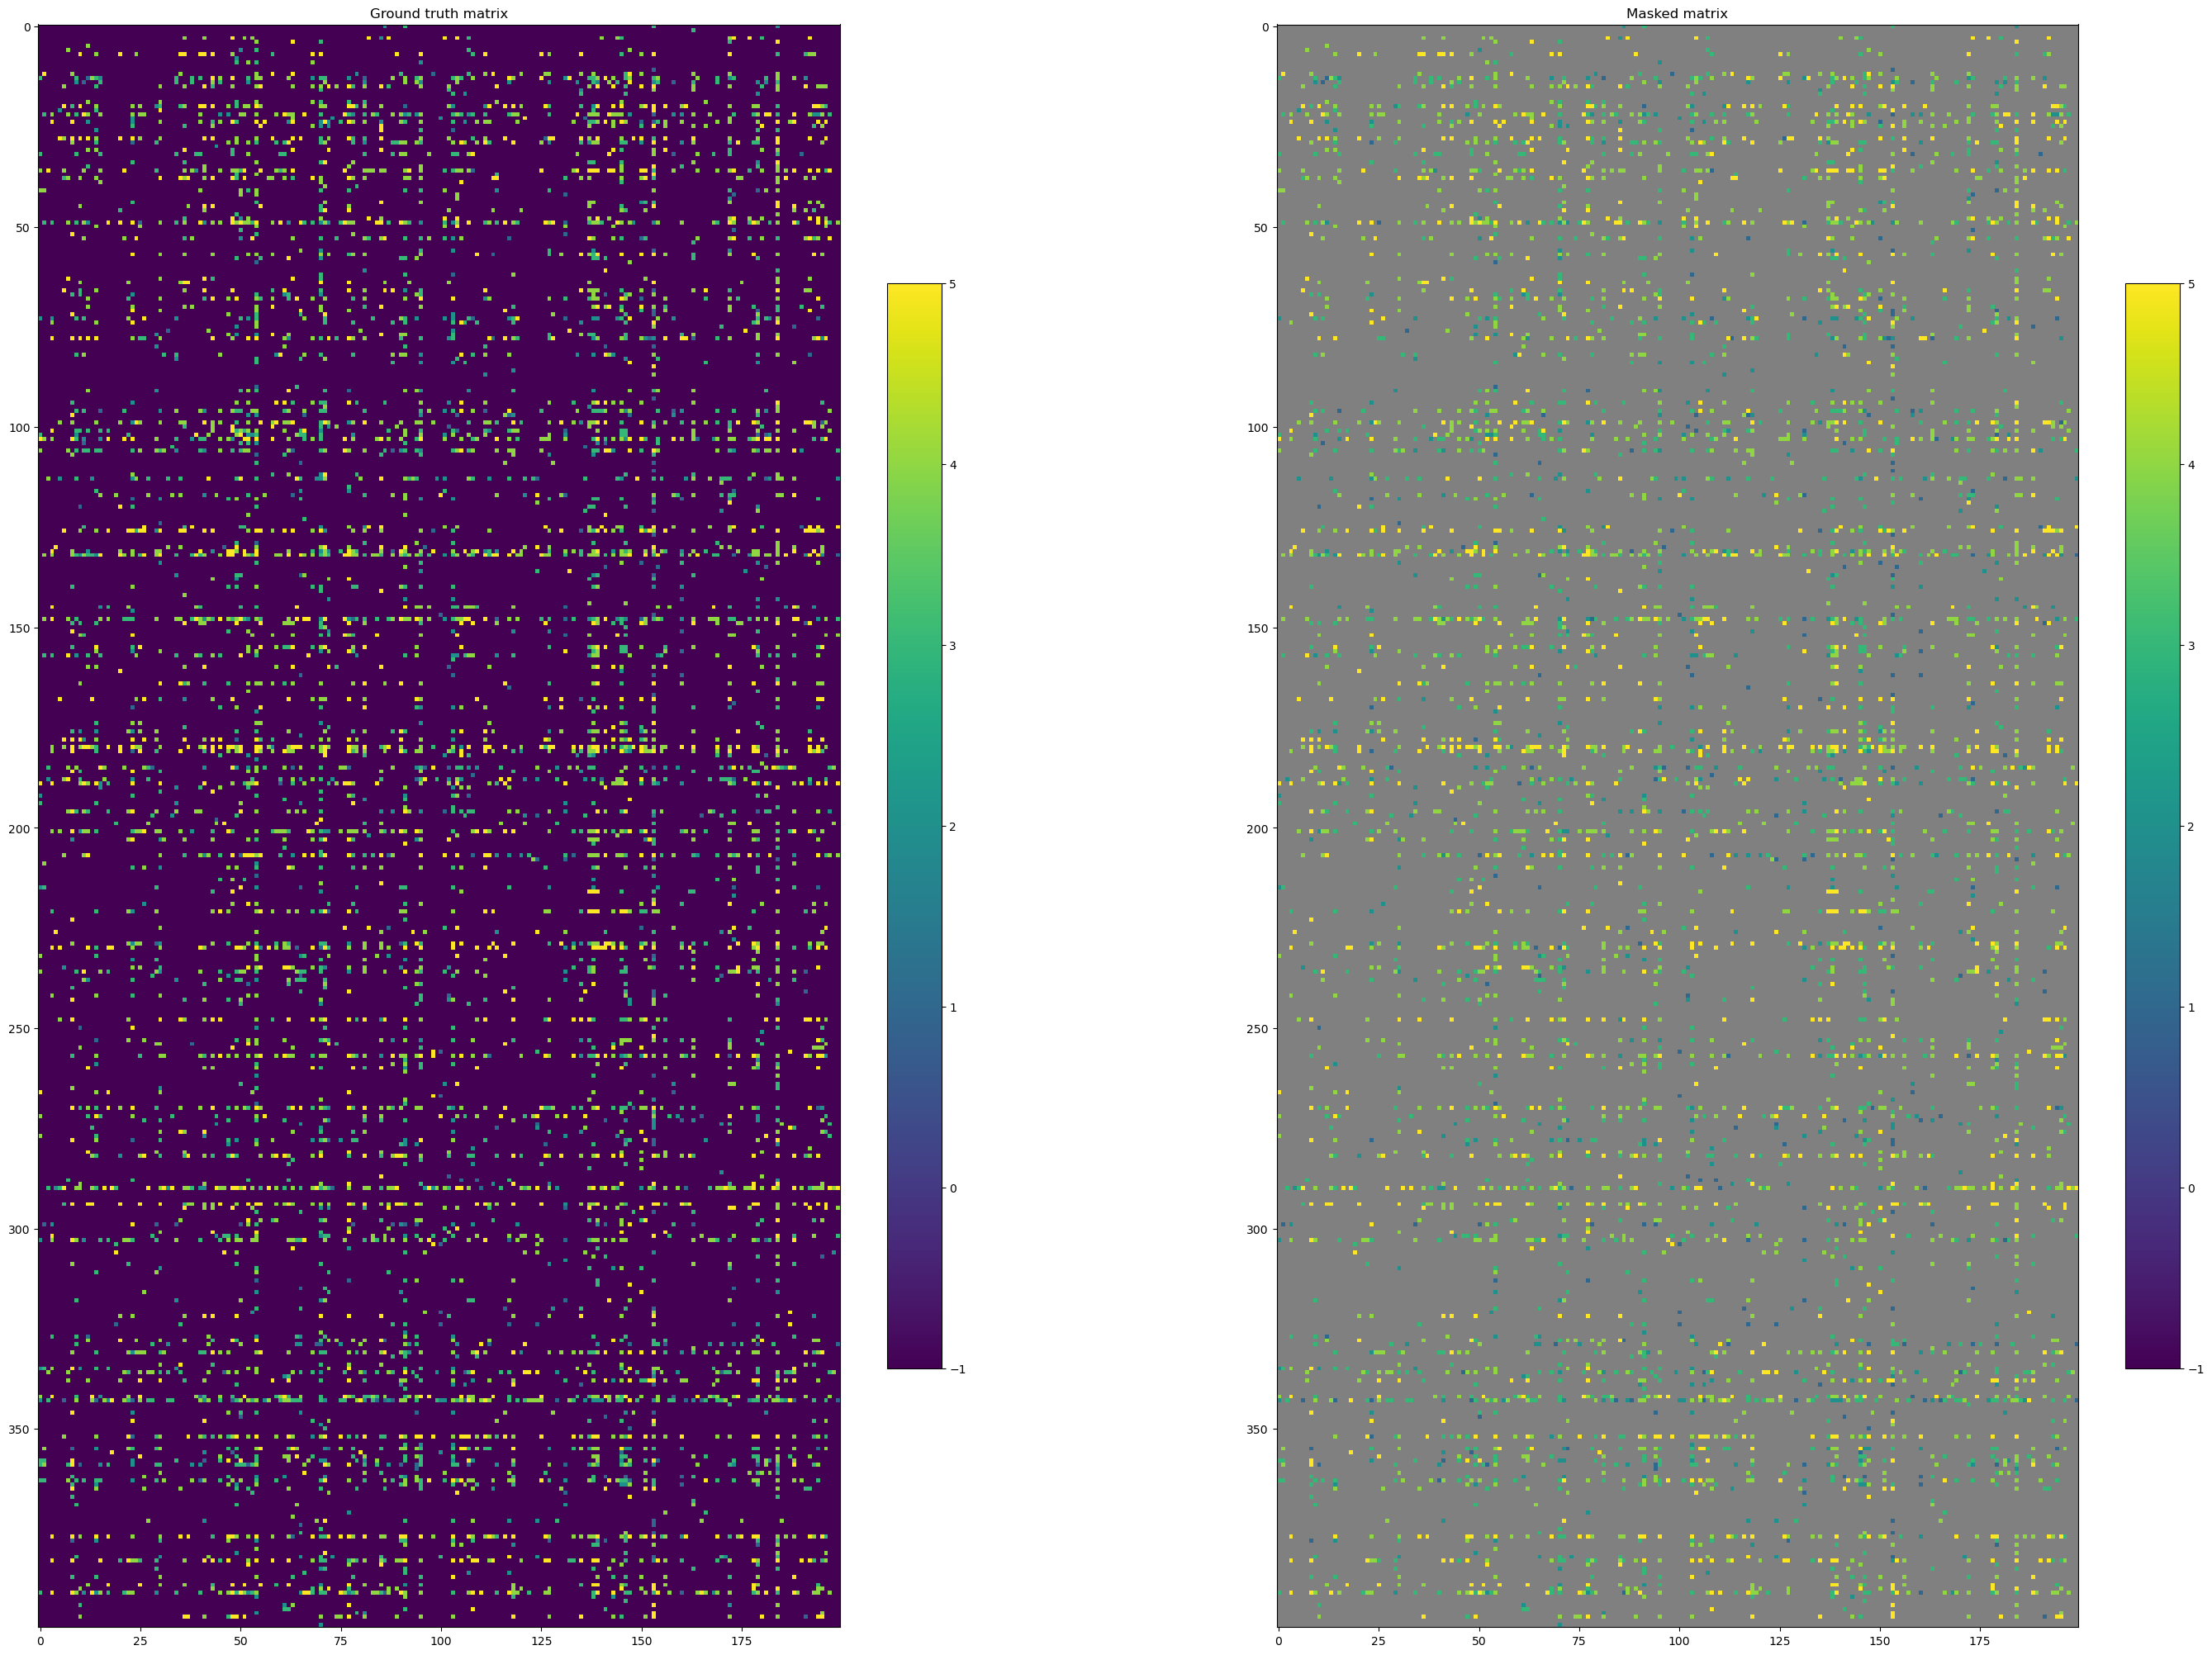

In [38]:
plot_before_after_mask(M, mask_obs, figsize=(30, 20))

In [29]:
 Mhat, _, _=pmf_solve(M, mask_train, k=r, max_iteration = 10, random_state=random_state)

Iteration: 1; Mean diff: 0.0087
Iteration: 2; Mean diff: 0.0080
Iteration: 3; Mean diff: 0.0025
Iteration: 4; Mean diff: 0.0012
Iteration: 5; Mean diff: 0.0009
Iteration: 6; Mean diff: 0.0008
Iteration: 7; Mean diff: 0.0007
Iteration: 8; Mean diff: 0.0006
Iteration: 9; Mean diff: 0.0005
Iteration: 10; Mean diff: 0.0004


In [30]:
w_obs=estimate_P(mask_avail, 1, r=5)

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
iter: 9
iter: 10
iter: 11
iter: 12
iter: 13
iter: 14
iter: 15
iter: 16
iter: 17
Function value changing by less than progTol


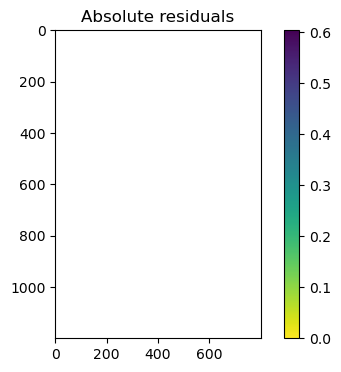

In [31]:
error_heatmap(w_obs, np.zeros_like(w_obs),mask_avail)

In [32]:
ci_method = SimulCI(M, Mhat, mask_obs, idxs_calib, k, w_obs=None,parent_mask=mask_avail)
df = ci_method.get_CI(idxs_test, alpha, allow_inf=allow_inf)
lower, upper, is_inf= df.loc[0].lower, df.loc[0].upper, df.loc[0].is_inf

Computing conformal prediction intervals for 100 test queries...


CI: 100%|████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.49it/s]

Done!


In [33]:
lower[lower <= 1] = 1
upper[upper >= 5] = 5

In [34]:
res = evaluate_SCI(lower, upper, k, M, idxs_test, is_inf=is_inf, method="SCMC")
res

,Query_coverage,Coverage,Size,Inf_prop,Method
0,0.94,0.988,3.716824,0.0,SCMC


In [35]:
mask_train, idxs_calib, mask_calib = sampler.sample_train_calib(mask_obs, 1, 
                                        calib_size=n_calib_queries*k, random_state=random_state)

print("Observation size: {}, training size: {}, calib size: {}, test queries: {}"
      .format(np.sum(mask_obs), np.sum(mask_train), np.sum(mask_calib), len(idxs_test[0])//k))

Observation size: 76170, training size: 61170, calib size: 15000, test queries: 100


In [63]:
# Train matrix completion model
Mhat, _, _ = pmf_solve(M, mask_train, k=r, max_iteration=30, random_state=random_state)

Iteration: 1; Mean diff: 0.0063
Iteration: 2; Mean diff: 0.0007
Iteration: 3; Mean diff: 0.0003
Iteration: 4; Mean diff: 0.0002
Iteration: 5; Mean diff: 0.0001
Iteration: 6; Mean diff: 0.0001
Iteration: 7; Mean diff: 0.0001
Iteration: 8; Mean diff: 0.0000
Iteration: 9; Mean diff: 0.0000
Iteration: 10; Mean diff: 0.0000
Iteration: 11; Mean diff: 0.0000
Iteration: 12; Mean diff: 0.0000
Iteration: 13; Mean diff: 0.0000
Iteration: 14; Mean diff: 0.0000
Iteration: 15; Mean diff: 0.0000
Iteration: 16; Mean diff: 0.0000
Iteration: 17; Mean diff: 0.0000
Iteration: 18; Mean diff: 0.0000
Iteration: 19; Mean diff: 0.0000
Iteration: 20; Mean diff: 0.0000
Iteration: 21; Mean diff: 0.0000
Iteration: 22; Mean diff: 0.0000
Iteration: 23; Mean diff: 0.0000
Iteration: 24; Mean diff: 0.0000
Iteration: 25; Mean diff: 0.0000
Iteration: 26; Mean diff: 0.0000
Iteration: 27; Mean diff: 0.0000
Iteration: 28; Mean diff: 0.0000
Iteration: 29; Mean diff: 0.0000
Iteration: 30; Mean diff: 0.0000


In [64]:
a_list = [alpha, alpha * k]
ci_method = Bonf_benchmark(M, Mhat, mask_obs, idxs_calib, k, w_obs=w_obs)
df = ci_method.get_CI(idxs_test, a_list, allow_inf=allow_inf)
for i, m in enumerate(["Bonferroni", "Uncorrected"]):
    lower, upper, is_inf= df.loc[i].lower, df.loc[i].upper, df.loc[i].is_inf
    lower[lower <= 0] = 0
    upper[upper >= 5] = 5
    res = pd.concat([res, evaluate_SCI(lower, upper, k, M, idxs_test, is_inf=is_inf, method=m)])

Computing Bonferroni-style intervals for 100 test queries...


CI: 100%|████████████████████████████████████████████████████████████████████████████| 300/300 [00:21<00:00, 14.13it/s]

Done!


In [65]:
res

,Query_coverage,Coverage,Size,Inf_prop,Method
0,0.88,0.956667,2.213244,0.0,SMC
0,0.89,0.960000,2.397347,0.0,Bonferroni
0,0.68,0.866667,0.995073,0.0,Uncorrected
